## Calculating the analytical solution for the solitary wave

Author: WaveHello <br>
Last Modified: 06/24/2024 <br>

**Purpose**: <br>
Calculate and recreate the analytical solution presented in the Non-Hydrostatic xBeach manual. This sheet only calculates the analytical solution.

**Link to the xBeach Non-Hydrostatic manual** <br>
[Link](https://oss.deltares.nl/documents/4142077/4199062/non-hydrostatic_report_draft.pdf/eadc1aff-6e19-6e82-2747-3c11c30457ee?t=1624871720408)

### Import modules/functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
import sys

PI = np.pi

In [3]:
sys.path.append(r"..\..\..\xBeach_Tutorial_Models")

from lib.solitary_funcs import (calc_L_scaling, calc_wave_speed, calc_surface_elevation,
                                calc_u_vel, calc_v_vel, calc_depth_average_u)


### Define the model parameters

In [4]:
# Input parameters
epsilons = np.array([0.1, 0.2, 0.4])
g = 9.81 #[m/s^2], gravity
d0 = 1 #[m], still water depth
num_times = 5

# Print values
print("Initial water depth: {:.2f}".format(d0))
print("Number of times: {}".format(num_times))

Initial water depth: 1.00
Number of times: 5


In [5]:
# Model parameters
# The model domain length and simulation time also change with the incident wave height

L_sol = calc_L_scaling(epsilons, delta_scaling=1/20) # Length of the solitary wave
L_channel = 100 * L_sol                             # Length of the domain
x0s = -2 * L_sol                                     # Initial x-offset
# x0s = -10 * L_sol                                     # Initial x-offset

c = calc_wave_speed(g, epsilons, d0)

print("Scaling wave lengths: {}".format(L_sol))
print("Channel Lengths: {}".format(L_channel))
print("x0 Locations: {}".format(x0s))
print("Wave speed: {}".format(c))

Scaling wave lengths: [7.95392551 5.62427466 3.97696275]
Channel Lengths: [795.39255065 562.42746627 397.69627532]
x0 Locations: [-15.90785101 -11.24854933  -7.95392551]
Wave speed: [3.2841662  3.42785092 3.69407874]


In [6]:
simulation_times = 104 * L_sol/c # Simulation time so that the wave has enough time to make it across the entire domain

# Init list to hold the times
times = [0] * len(simulation_times)

# Loop over the total simualtion times and store those
for i, t in enumerate(simulation_times):

    # Loop over each total simulation time and generate the array
    times[i] = np.linspace(0, t, num_times)

In [7]:
# Model domain paramters
num_wave_gridpoint = 160      # Number of grid points per wave length
dx = L_sol/num_wave_gridpoint # x-increment
num_grid_point = L_channel[0]/dx[0]

# Init list to hold the grids
grids = [0] * len(epsilons)

# Grid points
grid = np.linspace(0, L_channel[0], int(num_grid_point) )

print("Num Grid points: {}".format(num_grid_point))

Num Grid points: 15999.999999999998


### Calc solution for $\varepsilon = 0.1, 0.2, 0.4$

### Plot the solution

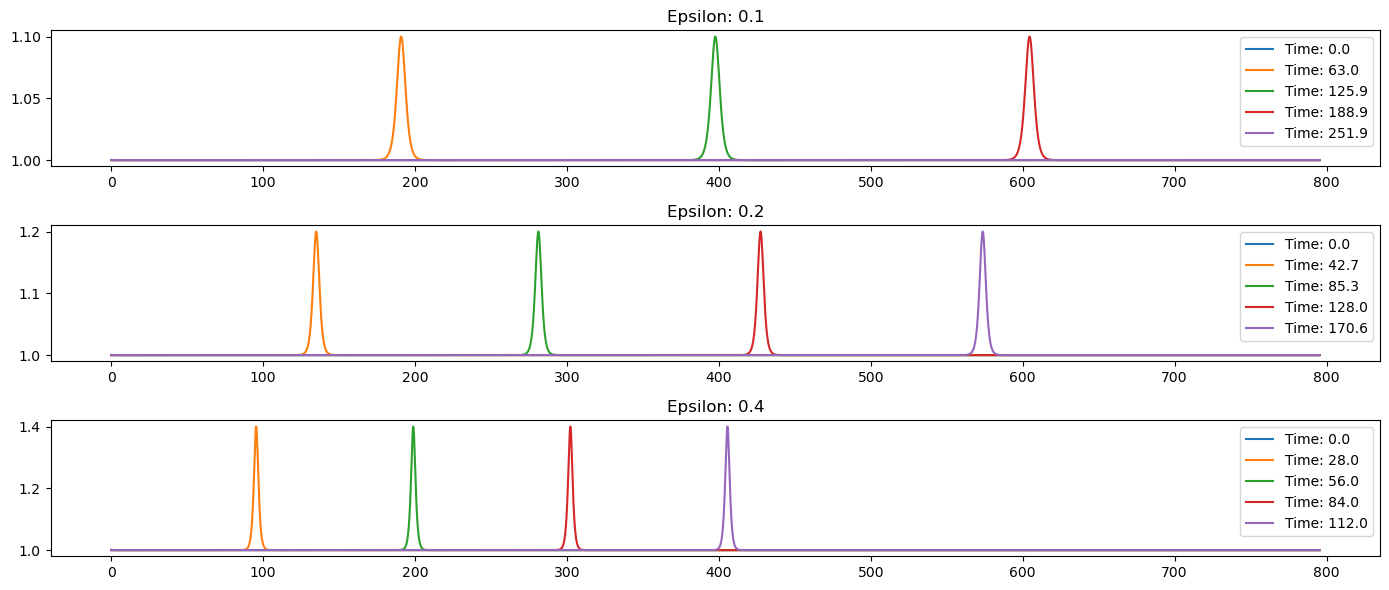

In [8]:
fig, axs = plt.subplots( ncols = 1, nrows = 3, figsize = (14, 6) )

# Loop over the epsilon values and iterate through the plots
for index, e in enumerate(epsilons):
    time = times[index]

    # Loop over the times and plot the solution at different times
    for j, t in enumerate(time):
        # Calc the solution of the domain
        eta = calc_surface_elevation(e, x0s[index], grid, t, g, d0)

        axs[index].set_title("Epsilon: {}".format(e))
        # Plot the result
        axs[index].plot(grid, eta, label = "Time: {}".format(t.round(1)))

    # axs[index].set_ylim([1, 1.45])
    axs[index].legend()

plt.tight_layout()
plt.show()

## Calculate water surface and velocities for $\varepsilon = 0.1$

The rest of the sheet only calculates solutions for $\varepsilon = 0.1$. The idea is that should be the easiest solution for xBeach to reproduce. To calculate the other solutions just change the value of epsilon.

### Calc the velocities at the water surface

In [9]:
# Set the index for the current wave
index = 0

# Select the first epsilon
epsilon = epsilons[index]

# Select the time arr
time = np.linspace(0, times[index][-1], 1000)

# Select the initial x0 location
x0 = x0s[index]

x_location = 0.0
# Calc the x velocity
u_vel = calc_u_vel(epsilon, x0 = x0, x = x_location, y = d0, t = time, g = g, d0 = d0)

# Calc the y velocity
v_vel = calc_v_vel(epsilon, x0 = x0, x = x_location, y = d0, t = time, g = g, d0 = d0)

# Calc the water surface elevation
eta = calc_surface_elevation(epsilon, x0, x= x_location, t = time, g = g, d0 = d0)

# Calc the average u velocity
u_avg = calc_depth_average_u(epsilon, x0, x = x_location, t = time, g = g, d0 = d0)

#### Check that the derived depth-averaged velocity is correct

In [10]:
# Check that the depth averaged velocity makes sense

num_locations = 100
y_locations = np.linspace(0, d0, num_locations)

u_sum = 0
for y in y_locations:
    # Calc the velocity
    u_vel = calc_u_vel(epsilon, x0 = x0, x = x_location, y = y, t = time, g = g, d0 = d0)

    # Sum the velocities
    u_sum += u_vel

# Average the velocities
u_avg_calc = u_sum/num_locations

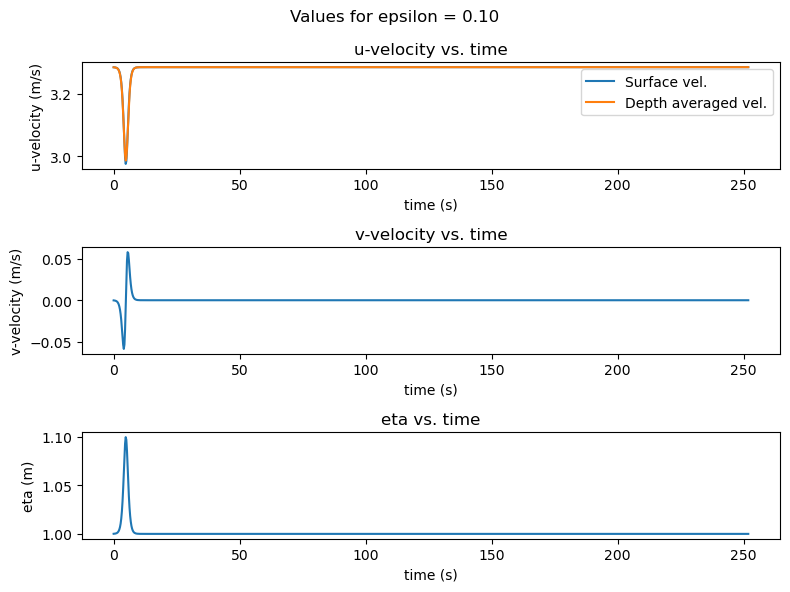

In [11]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (8, 6))

axs[0].plot(time, u_vel, label = "Surface vel.")
axs[0].plot(time, u_avg, label = "Depth averaged vel.")
axs[1].plot(time, v_vel)
axs[2].plot(time, eta)

# Plot the depth averaged velocity
# Label the plots
plt.suptitle("Values for epsilon = {:.2f}".format(epsilon))

axs[0].set_title("u-velocity vs. time")
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("u-velocity (m/s)")
axs[0].legend()

axs[1].set_title("v-velocity vs. time")
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("v-velocity (m/s)")

axs[2].set_title("eta vs. time")
axs[2].set_xlabel("time (s)")
axs[2].set_ylabel("eta (m)")

plt.tight_layout()
plt.show()